In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
import scikitplot as skplt

In [3]:
from sklearn.datasets import load_digits
X, y= load_digits(return_X_y=True)
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=1)
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(random_forest_clf, X, y)

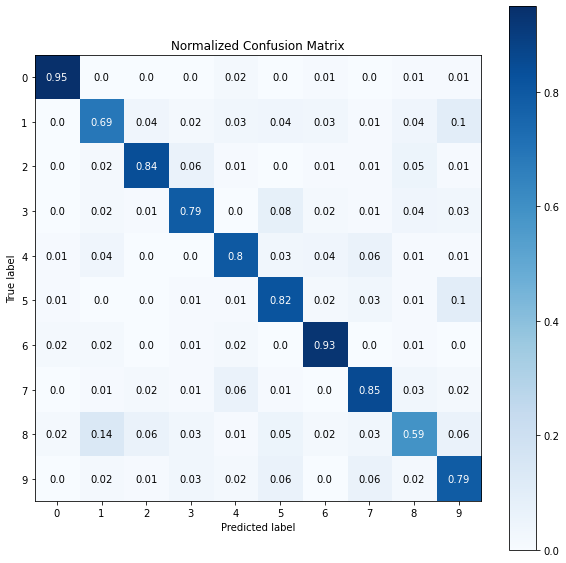

In [4]:
import scikitplot as skplt
plt.rcParams['figure.figsize'] = 10,10
skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

In [18]:
from sklearn.datasets import load_digits
X, y= load_digits(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3)

In [6]:
rf_clf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=1)

In [22]:
plt.rcParams['figure.figsize'] = 10,6
y_prob=rf_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_prob)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=300)
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 64 and input n_features is 30 

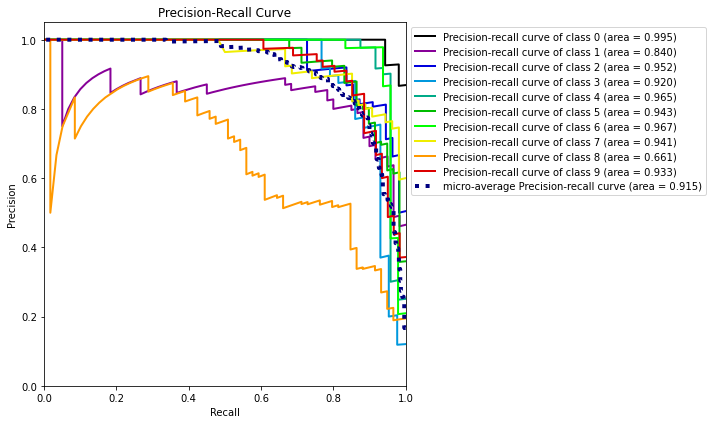

In [8]:

plt.rcParams['figure.figsize'] = 10,6
skplt.metrics.plot_precision_recall(y_test, y_prob)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.tight_layout()
plt.savefig('p_r.png', dpi=300)
plt.show()


In [20]:
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


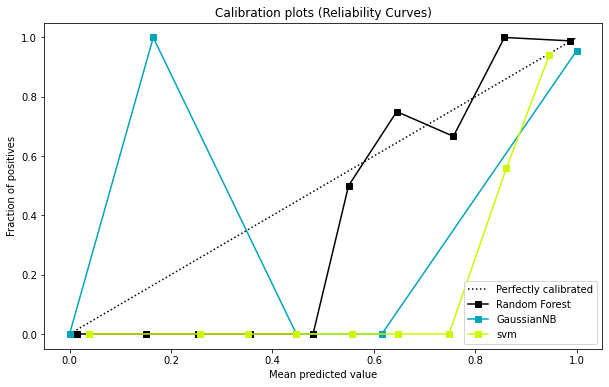

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

rf= RandomForestClassifier()
lr=LogisticRegression()
nb=GaussianNB()
svm=LinearSVC()

rf_proba=rf.fit(X_train,y_train).predict_proba(X_test)
lr_proba=lr.fit(X_train,y_train).predict_proba(X_test)
nb_proba=nb.fit(X_train,y_train).predict_proba(X_test)
svm_scores=svm.fit(X_train,y_train).decision_function(X_test)

names=['Random Forest','Logistic Regression','GaussianNB','svm']
proba_list=[rf_proba,lr_proba,nb_proba,svm_scores]

skplt.metrics.plot_calibration_curve(y_test, proba_list, names)
plt.savefig('calibration_curve.png', dpi=300)
plt.show()


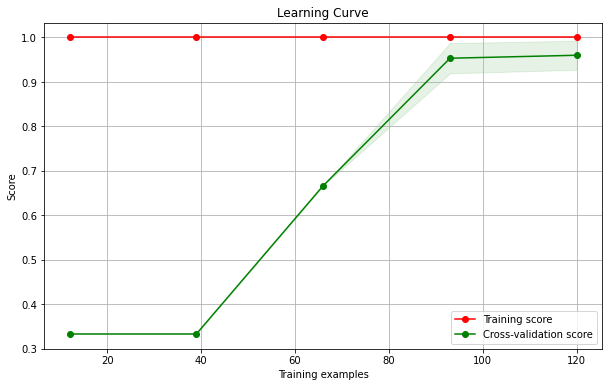

In [27]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(rf, X, y)
plt.savefig('learning_curve.png', dpi=300)
plt.show()

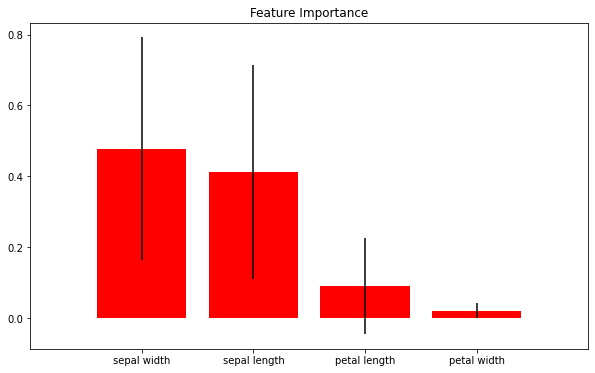

In [30]:
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True)
rf=RandomForestClassifier()
rf.fit(X,y)
skplt.estimators.plot_feature_importances(rf, feature_names=['petal length', 'petal width','sepal length', 'sepal width'])
plt.savefig('feature_importance.png', dpi=300)
plt.show()